In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="Set2")

# silence warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Load data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers with missing.csv to AirPassengers with missing.csv


In [3]:
df = pd.read_csv("AirPassengers with missing.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
124,1960-06,535
125,1960-09,508
126,1960-10,461
127,1960-11,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        129 non-null    object
 1   #Passengers  129 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        129 non-null    datetime64[ns]
 1   #Passengers  129 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 KB


In [7]:
df.sort_values(by=['Month'], inplace=True, ascending=True)

In [8]:
df.set_index("Month", inplace=True)

# Missing entries

In [9]:
df.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [10]:
min(df.index)

Timestamp('1949-01-01 00:00:00')

In [11]:
max(df.index)

Timestamp('1960-12-01 00:00:00')

In [12]:
all_datetimes = pd.date_range(min(df.index), max(df.index), freq="MS")
all_datetimes

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [13]:
all_datetimes.shape

(144,)

# Supplying missing values

## Insert missing datetimes

In [14]:
all_datetimes_df = pd.DataFrame(index=all_datetimes)
all_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Empty DataFrame


In [15]:
df = pd.merge(all_datetimes_df, df, how="left", left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  129 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


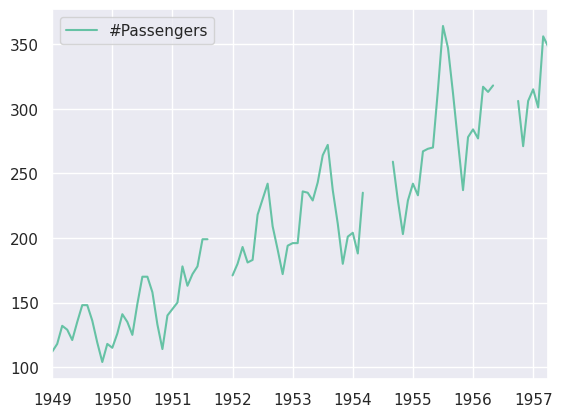

In [16]:
plot = df.head(100).plot()

## Forward-fill

In [17]:
df["ffilled"] = df["#Passengers"].ffill()
df.head(12)

,#Passengers,ffilled
1949-01-01,112.0,112.0
1949-02-01,118.0,118.0
1949-03-01,132.0,132.0
1949-04-01,129.0,129.0
1949-05-01,121.0,121.0
1949-06-01,135.0,135.0
1949-07-01,148.0,148.0
1949-08-01,148.0,148.0
1949-09-01,136.0,136.0
1949-10-01,119.0,119.0


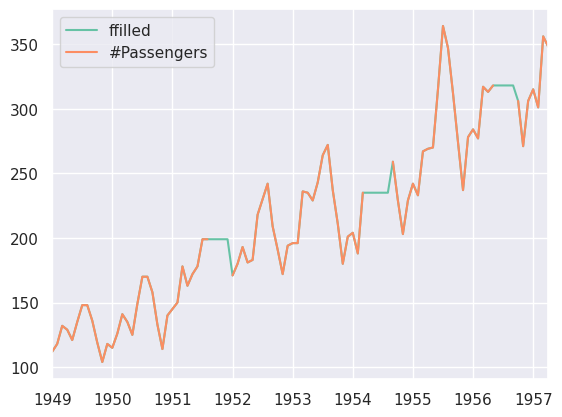

In [18]:
df = df[["ffilled", "#Passengers"]]
plot = df.head(100).plot()

In [19]:
df.drop("ffilled", axis=1, inplace=True)

## Backward-fill

In [20]:
df["bfilled"] = df["#Passengers"].bfill()
df.head(12)

,#Passengers,bfilled
1949-01-01,112.0,112.0
1949-02-01,118.0,118.0
1949-03-01,132.0,132.0
1949-04-01,129.0,129.0
1949-05-01,121.0,121.0
1949-06-01,135.0,135.0
1949-07-01,148.0,148.0
1949-08-01,148.0,148.0
1949-09-01,136.0,136.0
1949-10-01,119.0,119.0


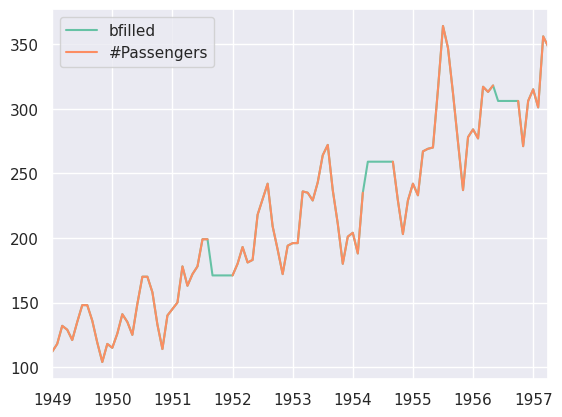

In [21]:
df = df[["bfilled", "#Passengers"]]
plot = df.head(100).plot()

In [22]:
df.drop("bfilled", axis=1, inplace=True)

## Interpolate

In [23]:
df["interpolated"] = df["#Passengers"].interpolate(method="linear", axis=0)
df.head()

,#Passengers,interpolated
1949-01-01,112.0,112.0
1949-02-01,118.0,118.0
1949-03-01,132.0,132.0
1949-04-01,129.0,129.0
1949-05-01,121.0,121.0


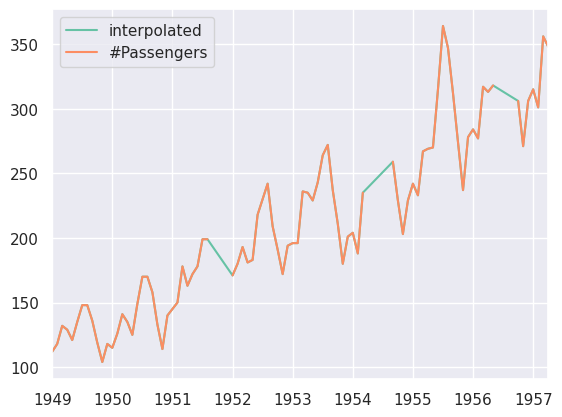

In [24]:
df = df[["interpolated", "#Passengers"]]
plot = df.head(100).plot()

In [25]:
df.drop("interpolated", axis=1, inplace=True)

In [26]:
df = df.interpolate(method="linear", axis=0)

In [27]:
df.head(10)

,#Passengers
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0
1949-10-01,119.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


# Difference

In [29]:
diffed = df.diff()
diffed

,#Passengers
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-9.0
1960-09-01,-9.0
1960-10-01,-47.0
1960-11-01,-71.0


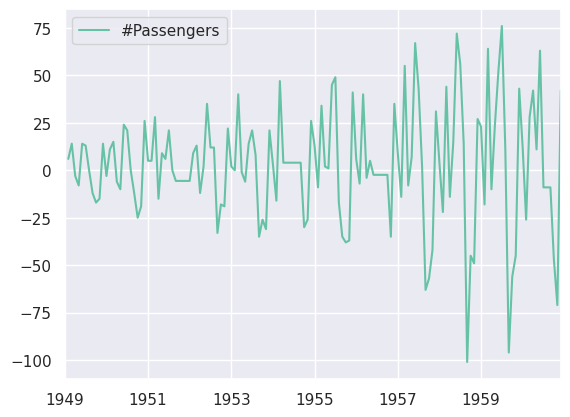

In [30]:
plot = diffed.plot()

# Shift

In [31]:
df["shifted"] = df["#Passengers"].shift(1)
df.head()

,#Passengers,shifted
1949-01-01,112.0,NaN
1949-02-01,118.0,112.0
1949-03-01,132.0,118.0
1949-04-01,129.0,132.0
1949-05-01,121.0,129.0


In [32]:
df["shifted"] = df["#Passengers"].shift(-1)
df.head()

,#Passengers,shifted
1949-01-01,112.0,118.0
1949-02-01,118.0,132.0
1949-03-01,132.0,129.0
1949-04-01,129.0,121.0
1949-05-01,121.0,135.0


# **Citing this notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Machine Learning for Business. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-451---Machine-Learning-for-Business-Analytics/tree/main